In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from mpl_toolkits.basemap import Basemap
from datetime import datetime
from bokeh.plotting import figure, output_file, show

In [90]:
df = pd.read_csv('data/dev_lang.csv')
df.set_index('Country Code', inplace=True, drop=False)
lang = pd.read_excel('data/end_lang.xlsx')
del lang['Name in French']
del lang['Name in Spanish']
del lang['ID']
del lang['Sources']

In [91]:
lang['Degree of endangerment'].value_counts()

Definitely endangered    680
Vulnerable               628
Critically endangered    607
Severely endangered      554
Extinct                  253
Name: Degree of endangerment, dtype: int64

In [92]:
extinct = lang[lang['Degree of endangerment'] == 'Extinct']
critical = lang[lang['Degree of endangerment'] == 'Critically endangered']
severe = lang[lang['Degree of endangerment'] == 'Severely endangered']

/anaconda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3260: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/anaconda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3269: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


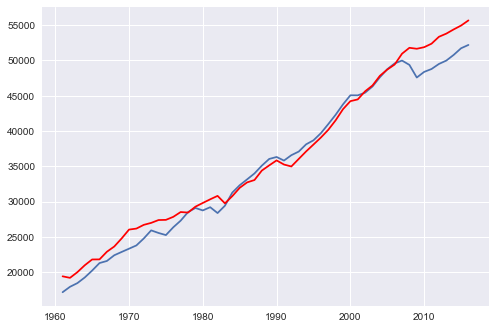

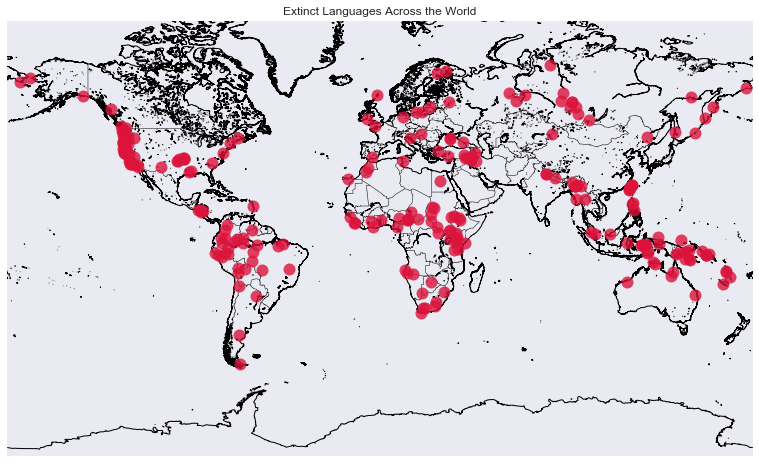

In [93]:
plt.figure(figsize=(15,8))
m = Basemap(projection = 'mill', llcrnrlat = -80, urcrnrlat = 80, llcrnrlon = -180, urcrnrlon = 180, resolution = 'h')
m.drawcoastlines()
m.drawcountries()

x, y = m(list(extinct["Longitude"].astype(float)), list(extinct["Latitude"].astype(float)))
m.plot(x, y, 'go', markersize = 12, alpha = 0.8, color = "crimson")

plt.title('Extinct Languages Across the World')
plt.show()


In [94]:
ext = extinct['Country codes alpha 3'].value_counts()

In [95]:
cr  = critical['Country codes alpha 3'].value_counts()

In [96]:
sev  = severe['Country codes alpha 3'].value_counts()

In [97]:
ext  = pd.DataFrame(ext)
cr = pd.DataFrame(cr)
sev = pd.DataFrame(sev)

In [98]:
ext.reset_index(inplace=True)
cr.reset_index(inplace=True)
sev.reset_index(inplace=True)

In [99]:
ext.columns = ['country', 'count']
cr.columns = ['country', 'count']
sev.columns = ['country', 'count']
count = pd.merge(left=ext, right=cr, left_on='country', right_on='country', how='outer')
count = pd.merge(left=count, right=sev, left_on='country', right_on='country', how='outer')
count.columns = ['country', 'extinct', 'critical', 'severe']


In [100]:
count['total'] = count.sum(axis=1)
count.head()

,country,extinct,critical,severe,total
0,USA,54.0,80.0,40.0,174.0
1,RUS,24.0,21.0,27.0,72.0
2,BRA,12.0,43.0,19.0,74.0
3,IDN,12.0,32.0,19.0,63.0
4,CHN,10.0,22.0,19.0,51.0


In [101]:
count = count.sort_values(by='total', axis=0, ascending=False, inplace=False, kind='quicksort', na_position='last')

In [102]:
count.reset_index(inplace=True)
count.fillna(value=0, inplace=True)


In [103]:
count = count.head(21)

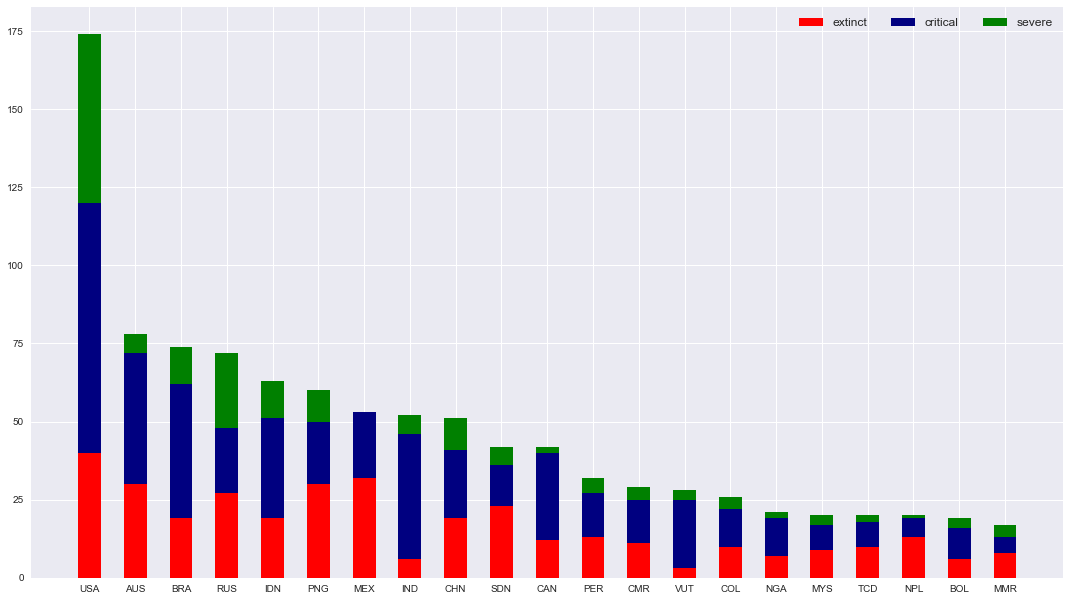

In [104]:
header = ['extinct','critical','severe']

matplotlib.rc('font', serif='Helvetica Neue')
matplotlib.rc('text', usetex='false')
matplotlib.rcParams.update({'font.size': 40})

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)

width = 0.5
labels = list(count.country)


p1 = plt.bar(count.index, count.severe, width, color='red')
p2 = plt.bar(count.index, count.critical, width, bottom = count.severe, color='navy')
p3 = plt.bar(count.index, count.extinct, width, bottom= np.array(count.critical)+np.array(count.severe), color='green')

plt.xticks(count.index, labels)

plt.legend((p1[0], p2[0], p3[0]), (header[0], header[1], header[2]), fontsize=12, ncol=4, framealpha=0, fancybox=True)
plt.show()
plt.savefig('Viz/stackedbar_counts.png')

In [105]:
df_20 = df.loc[['USA', 'AUS', 'BRA', 'RUS', 'IDN', 'PNG', 'MEX', 'IND', 'CHN', 'SDN', 'CAN', 'PER', 'CMR', 'VUT', 'COL', 'NGA', 'MYS', 'TCD', 'NPL', 'BOL', 'MMR']]


In [106]:
years = ['1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973','1974','1975','1976','1977','1978','1979','1980','1981','1982','1983','1984','1985','1986','1987','1988','1989','1990','1991','1992','1993','1994','1994','1995','1996','1997','1998','1999','2000','2001', '2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016']
keep =['Country Name', 'Country Code', 'Indicator Name', 'Name in English', 'Countries', 'Degree of endangerment', 'Number of speakers', 'Latitude', 'Longitude', 'Description of the location']

In [107]:
df_melt = pd.melt(df_20, id_vars=keep, value_vars=years)
df_melt.head()

,Country Name,Country Code,Indicator Name,Name in English,Countries,Degree of endangerment,Number of speakers,Latitude,Longitude,Description of the location,variable,value
0,United States,USA,"Adolescent fertility rate (births per 1,000 wo...",Navajo,United States of America,Vulnerable,120000.0,35.8044,-108.475,the Navajo Nation is located in the region of ...,1961,82.734600
1,United States,USA,Age dependency ratio (% of working-age populat...,Navajo,United States of America,Vulnerable,120000.0,35.8044,-108.475,the Navajo Nation is located in the region of ...,1961,67.061661
2,United States,USA,"Age dependency ratio, old (% of working-age po...",Navajo,United States of America,Vulnerable,120000.0,35.8044,-108.475,the Navajo Nation is located in the region of ...,1961,15.421149
3,United States,USA,"Age dependency ratio, young (% of working-age ...",Navajo,United States of America,Vulnerable,120000.0,35.8044,-108.475,the Navajo Nation is located in the region of ...,1961,51.640512
4,United States,USA,Agricultural land (% of land area),Navajo,United States of America,Vulnerable,120000.0,35.8044,-108.475,the Navajo Nation is located in the region of ...,1961,48.860242


In [108]:
df_melt['year'] = pd.to_datetime(df_melt['variable'])
df_melt['year'] = df_melt['year'].dt.year

In [123]:
df_c = df_melt.set_index(['Country Code', 'year'])

In [128]:
df_gdp = df_c[df_c['Indicator Name']=='GDP per capita (constant 2010 US$)']
df_gdp = df_gdp[['Country Name', 'variable','value']]

In [130]:
sns.lmplot(x=df_gdp['variable'], y=df_gdp['value'], data=df_gdp)
plt.show()

TypeError: '<' not supported between instances of 'numpy.ndarray' and 'str'

In [120]:
USA = df_c.loc['USA']
AUS = df_c.loc['AUS']
BRA = df_c.loc['BRA']
RUS = df_c.loc['RUS']
IDN = df_c.loc['IDN']
PNG = df_c.loc['PNG']
MEX = df_c.loc['MEX']
IND = df_c.loc['IND']
CHN = df_c.loc['CHN']
SDN = df_c.loc['SDN']
CAN = df_c.loc['CAN']

In [121]:
USA_GDP = USA[USA['Indicator Name']=='GDP per capita (constant 2010 US$)']
USA_GDP = USA_GDP[['variable', 'value']]
AUS_GDP = AUS[AUS['Indicator Name']=='GDP per capita (constant 2010 US$)']
AUS_GDP = AUS_GDP[['variable', 'value']]
BRA_GDP = BRA[BRA['Indicator Name']=='GDP per capita (constant 2010 US$)']
BRA_GDP = BRA_GDP[['variable', 'value']]
RUS_GDP = RUS[RUS['Indicator Name']=='GDP per capita (constant 2010 US$)']
RUS_GDP = RUS_GDP[['variable', 'value']]

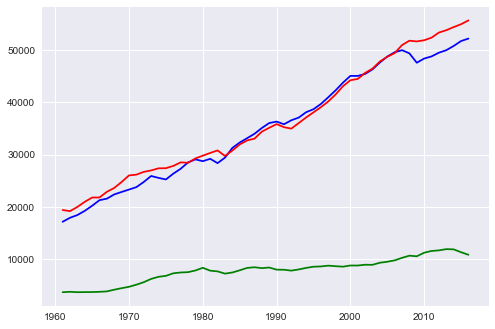

In [122]:
plt.plot(USA_GDP['value'], color='blue')
plt.plot(AUS_GDP['value'], color='red')
plt.plot(BRA_GDP['value'], color='green')
plt.plot(RUS_GDP['value'], color='pink')
plt.show()

### Questions
Where are there concentrations of extinct langauges?

### Trends

### Visualizations

### Conclusions